# Pair Plots Tutorial in Julia

Copyright 2022 Kiar Fatah

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



We begin by importing the necessary packages. For graphing the result only CairoMakie is needed and the rest is for creating the dataset.

In [8]:
using CairoMakie
using Distributions
using LinearAlgebra

For the curious ones, the dataset is derived from simulation of a 4 dimensional Clayton Copula with 30 samples and $\theta = 3$.

In [10]:
function claytonCopula(θ::Int64, samples::Int64, dim::Int64)
    res = zeros(dim, samples)
    U_dist = Uniform(0,1)
    γ_dist = Gamma(1/θ,1)
    for i = 1:samples
        V = rand(U_dist, dim)
        γ = rand(γ_dist, 1)
        Ψ(t) = (t+1)^(-1/θ)
        U_γ = Ψ.(-log.(V)./γ)
        for j = 1:dim
            res[j,i] = U_γ[j]
        end
    end
    return res
end

data = claytonCopula(3, 30, 4)

4×30 Matrix{Float64}:
 0.974319  0.743204  0.0747637  0.627485  …  0.126998   0.879956  0.68263
 0.810654  0.573723  0.195484   0.486592     0.191358   0.702343  0.845819
 0.859873  0.612185  0.114028   0.971697     0.11337    0.719218  0.908809
 0.744582  0.926167  0.154692   0.921218     0.0975944  0.867407  0.790034

As mentioned above the dimension of the dataset is 4, thus we need 4 graphs. In addition the fontsize to 10 and the positions of the x- and y-axis is adjusted.

In [39]:
dim = 4
f = Figure(fontsize = 10)
axs2 = [Axis(f[i, j], xaxisposition = (i == 1 ? :top : :bottom), 
        yaxisposition = (j == 1 ? :left : :right)) for i in 1:n, j in 1:n]

4×4 Matrix{Axis}:
 Axis (1 plots)  Axis (1 plots)  Axis (1 plots)  Axis (1 plots)
 Axis (1 plots)  Axis (1 plots)  Axis (1 plots)  Axis (1 plots)
 Axis (1 plots)  Axis (1 plots)  Axis (1 plots)  Axis (1 plots)
 Axis (1 plots)  Axis (1 plots)  Axis (1 plots)  Axis (1 plots)

Here we consider using hidexdecorations and hideydecorations to remove the not wanted x- and y-axis, thus the number of if and ifelse statements.

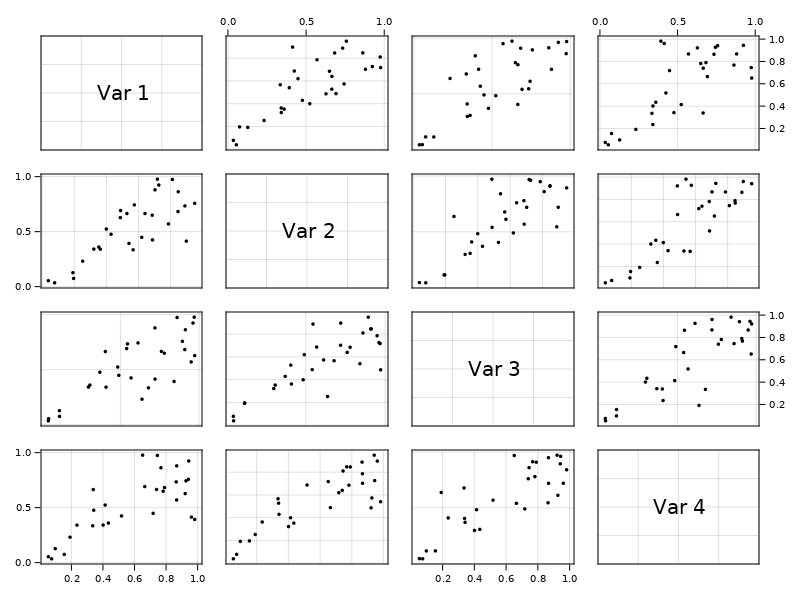

In [40]:
for row in 1:dim, col in 1:dim
    # Hide x and y axes!
    if row == col
        hidedecorations!(axs2[row,col], grid = false)
        index = row
        text!(axs2[row, col], "Var $index", align = (:center, :center))
        # Avoid plotting when row == col
        continue
    elseif (row != 1 && col != 1 && col != dim && row != dim) 
        hidexdecorations!(axs2[row,col], grid = false)
        hideydecorations!(axs2[row,col], grid = false)
    elseif (mod(col,2) != 0 && row == 1) || (mod(col,2) == 0 && row == dim)
        hidexdecorations!(axs2[row,col], grid = false)
        hideydecorations!(axs2[row,col], grid = false)
    elseif (mod(row,2) != 0 && col == 1) || (mod(row,2) == 0 && col == dim)
        hidexdecorations!(axs2[row,col], grid = false)
        hideydecorations!(axs2[row,col], grid = false)
    elseif (row ∈ [1,dim]) && (col ∉ [1,dim])
        hideydecorations!(axs2[row,col], grid = false)
    elseif (row ∉ [1,dim]) && (col ∈ [1,dim])
        hidexdecorations!(axs2[row,col], grid = false)
    end
    
    # Plot
    scatter!(axs2[row, col], data[row, :], data[col,:],  color = (:black, 1), markersize = 3.5)

end
# Show the plot
f